In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/dados_rh.csv')

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


➡️Comando para saber a quantidade de linhas e colunas respectivamente

In [5]:
df.shape

(1470, 35)

In [6]:
print(f"O banco de dados tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

O banco de dados tem 1470 linhas e 35 colunas.


➡️ O trecho abaixo verifica se há valores nulos e se houver ele conta quantos valores nulos há por coluna. No banco analisado não há valores nulos.

In [22]:
nulos = df.isnull().sum()

print("Número de dados nulos por coluna:")
colunas_com_nulos = nulos[nulos > 0]

if len(colunas_com_nulos) > 0:
    print(colunas_com_nulos)
else:
    print("Não tem valores nulos.")

Número de dados nulos por coluna:
Não tem valores nulos.


➡️ O trecho abaixo exibe os tipos de dados de cada coluna do dataset

In [10]:
print(df.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

➡️O setor de Research & Development tem a maior parte dos funcionários, seguido por Sales e Human Resources com o menor quantidade de pessoas. Esta distribuição revela que a empresa provavelmente tem foco em inovação e desenvolvimento de produtos. Com esses dados a empresa pode avaliar se possui a quantidade desejada de funcinários em cada setor.

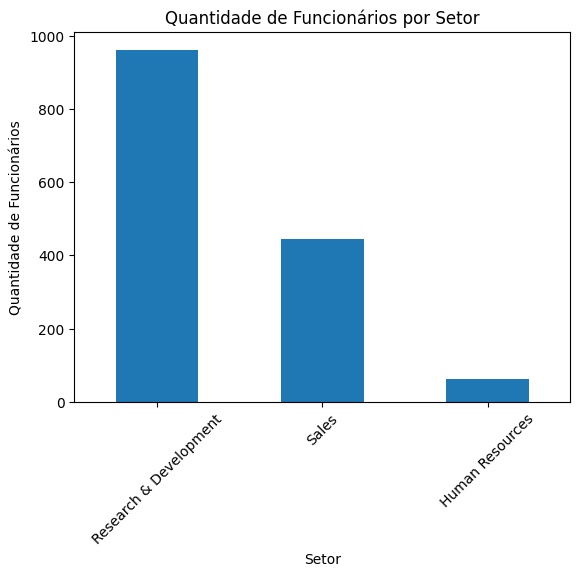

In [14]:
department_counts = df['Department'].value_counts()

department_counts.plot(kind='bar')
plt.title('Quantidade de Funcionários por Setor')
plt.xlabel('Setor')
plt.ylabel('Quantidade de Funcionários')
plt.xticks(rotation=45)
plt.show()

➡️ A distribuição de funcionários por escolaridade mostra uma maioria no nível 3 de escolaridade. Também podemos observar que a empresa contrata significativamente menos pessoas com maior grau de escolaridade. Com essas informações a empresa pode avaliar se precisa ou não de mais pessoas com esse tipo de escolaridade.

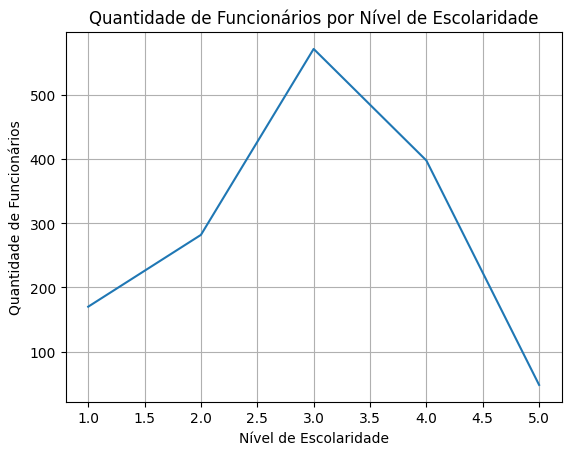

In [18]:
education_counts = df['Education'].value_counts().sort_index()

education_counts.plot(kind='line')
plt.title('Quantidade de Funcionários por Nível de Escolaridade')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Quantidade de Funcionários')
plt.grid(True)
plt.show()

➡️ A maioria dos funcionários (83,9%) não apresenta atrito na empresa, enquanto apenas 16,1% dos funcionários têm algum atrito. Isso sugere uma maioria positiva, embora a empresa em questão ainda deva se preocupar com essa minoria.

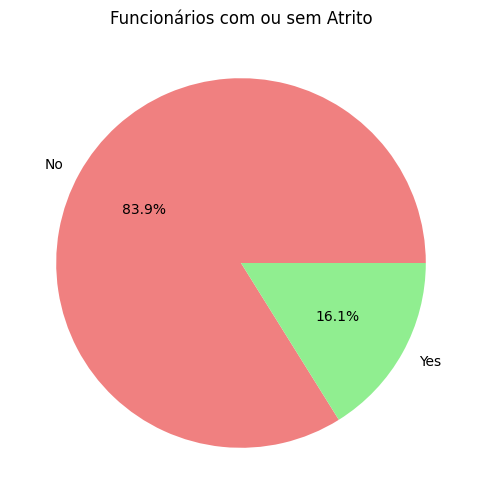

In [21]:
attrition_counts = df['Attrition'].value_counts()

attrition_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=['lightcoral', 'lightgreen'])
plt.title('Funcionários com ou sem Atrito')
plt.ylabel('')
plt.show()
